In [260]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
df = pd.read_csv("USA_cars_datasets.csv")

df.head()

Saving USA_cars_datasets.csv to USA_cars_datasets (10).csv


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [261]:
df.info(memory_usage='deep')
df['brand'].unique()
df = df.convert_dtypes('mileage')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.4 MB


In [262]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['brand']) 
df['brand'] = label_encoder.transform(df['brand']) 

df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,27,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,8,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,7,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,8,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,5,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [263]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [264]:
# label_encoder = preprocessing.LabelEncoder() 
# label_encoder.fit(df['brand']) 
# df['brand'] = label_encoder.transform(df['brand']) 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['title_status']) 
df['title_status'] = label_encoder.transform(df['title_status']) 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['model']) 
df['model'] = label_encoder.transform(df['model']) 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['color']) 
df['color'] = label_encoder.transform(df['color']) 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['state']) 
df['state'] = label_encoder.transform(df['state']) 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['country']) 
df['country'] = label_encoder.transform(df['country']) 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['condition']) 
df['condition'] = label_encoder.transform(df['condition']) 

# label_encoder = preprocessing.LabelEncoder() 
# label_encoder.fit(df['vin']) 
# df['vin'] = label_encoder.transform(df['vin']) 

df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,27,25,2008,0,274117,2,jtezu11f88k007763,159348797,24,1,3
1,1,2899,8,92,2011,0,190552,39,2fmdk3gc4bbb02217,166951262,35,1,39
2,2,5350,7,75,2018,0,39590,39,3c4pdcgg5jt346413,167655728,7,1,16
3,3,25000,8,32,2014,0,64146,4,1ftfw1et4efc23745,167753855,39,1,20
4,4,27700,5,0,2018,0,6654,34,3gcpcrec2jg473991,167763266,6,1,20


In [265]:
X = df[['brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'lot', 'state', 'country', 'condition']].values

y = df['price'].values

features = pd.Series(['brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'lot', 'state', 'country', 'condition'])
features

0           brand
1           model
2            year
3    title_status
4         mileage
5           color
6             lot
7           state
8         country
9       condition
dtype: object

In [266]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
coeff_df

,Coefficient,features
0,-558.181271,brand
1,26.459409,model
2,861.071973,year
3,-6694.552102,title_status
4,-0.038574,mileage
5,-24.669613,color
6,0.001091,lot
7,-39.326743,state
8,-8894.154761,country
9,-9.670572,condition


In [267]:
slr.intercept_

-1883596.1543888678

In [268]:
X = df[['brand']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [-444.00352138]
Intercept: 23096.839056397508


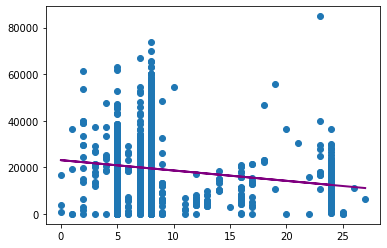

In [269]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [20.8936812]
Intercept: 17703.280963237718


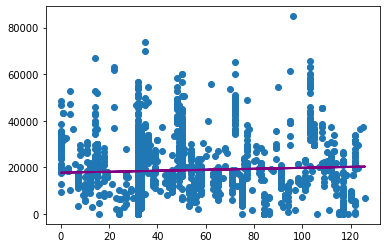

In [270]:
X = df[['model']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [1472.07331043]
Intercept: -2949983.6032930096
MSE: 121068265.189


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


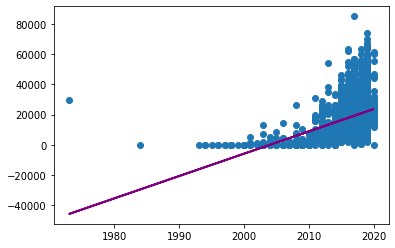

In [280]:
X = df[['year']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

Slope:  [-17581.43350544]
Intercept: 19914.43964041096


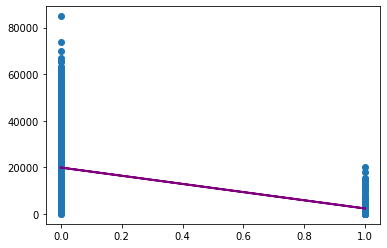

In [272]:
X = df[['title_status']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [-0.08134246]
Intercept: 23021.77515024407


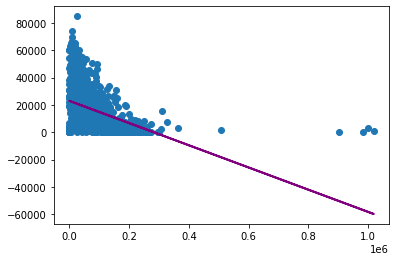

In [273]:
X = df[['mileage']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [1.22355162]
Intercept: 18736.551933762017


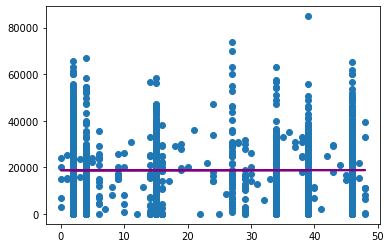

In [274]:
X = df[['color']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [0.00947106]
Intercept: -1569447.2324463706


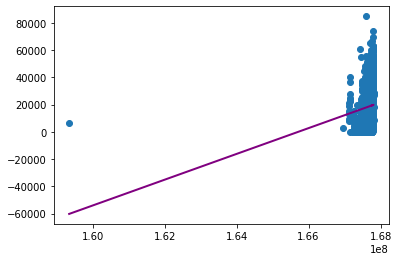

In [275]:
X = df[['lot']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [17.23580371]
Intercept: 18394.532526508898


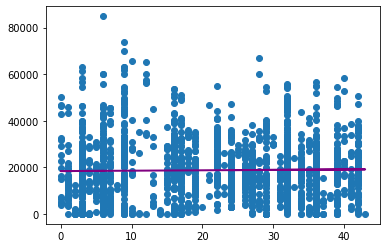

In [276]:
X = df[['state']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [-11622.02608347]
Intercept: 30357.14285714284


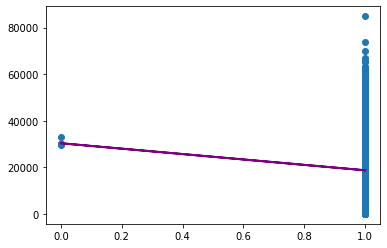

In [277]:
X = df[['country']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

Slope:  [7.45698523]
Intercept: 18625.436711554652


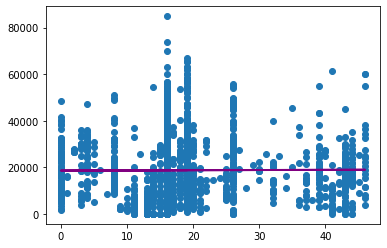

In [278]:
X = df[['condition']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

In [279]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 146735341.407


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
